# PART1 Search Methods

### Extract Data from string

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re
def get_city_info(city_data):
    city_loc = {} # init dict
    for line in city_data.split('\n'):
        if line.strip().startswith('//'): continue # ignore line started with '//'
        if not line.strip(): continue             # skip empty line
        city = re.findall("name:'(\w+)'", line)[0] # find the city name in the line
        x_y = re.findall('geoCoord:\[(\d+\.?\d+),\s(\d+\.?\d+)\]', line)[0] # find the coordination of city
        city_loc[city] = tuple(map(float, x_y))
    return city_loc
        

In [3]:
city_info = get_city_info(coordination_source)
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

### Calculate the distance between cities

#### 球面上两点的弧长公式

$$ Distance=\arccos(\cos\beta_1\cos\beta_2\cos(\alpha_1-\alpha_2)+\sin\beta_1\sin\beta_2) $$

In [4]:
import math

def loc_distance(begin, destination):
    """
    Calculate the Haversine distance.
    
    Parameters:
    begin: tuple of float (long, lat)
    destination: tuple of float (long, lat)
    
    Returns: distance in km: float
    """
    # 老师上课时没时间查，实际上提供的坐标为（经度，纬度），和上课时相反；这里我就按照正确的来写了
    rlong1, rlat1 = map(math.radians, begin) #角度转换为弧度
    rlong2, rlat2 = map(math.radians, destination)
    radius = 6371 # km
    
    d = radius * math.acos(math.cos(rlat1) * math.cos(rlat2) * math.cos(rlong1 - rlong2) + 
                  math.sin(rlat1) * math.sin(rlat2))
    return d

In [5]:
# return the distance between two city
def city_distance(city1, city2):
    return loc_distance(city_info[city1], city_info[city2])

In [6]:
city_distance('杭州', '上海') # 经纬度和上课不同，所以结果也不同

163.07608214040593

### Draw the graph

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

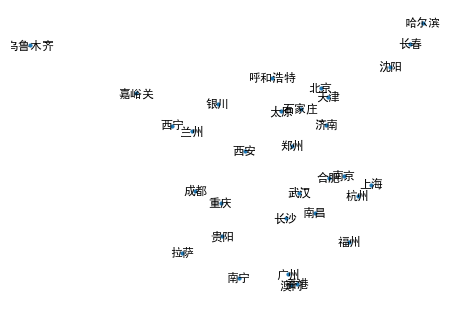

In [8]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

### Build connection between

In [9]:
from collections import defaultdict

# Assume that two cities are linked if distance less than 700km
threshold = 700

def build_connection(city_info):
    cities_connection = defaultdict(list) # 这里使用defaultdict可以防止key error
    for c1 in city_info.keys():
        for c2 in city_info.keys():
            if c1 == c2: continue
            
            if city_distance(c1, c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection
cities_connection = build_connection(city_info)

In [10]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '西安', '银川'],
             '嘉峪关': ['兰州', '西宁'],
             '西宁': ['兰州', '嘉峪关', '成都', '银川'],
             '成都': ['兰州', '西宁', '拉萨', '贵阳', '西安', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '西安', '北京', '天津', '呼和浩特'],
             '拉萨': ['成都', '贵阳', '重庆', '南宁'],
             '贵阳': ['成都', '拉萨', '长沙', '重庆', '南宁'],
             '武汉': ['郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '西安', '上海'],
             '郑州': ['石家庄',
              '武汉',
              '济南',
              '南京',
              '合肥',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '济南': ['石家庄', '郑州', '南京', '合肥', '太原', '北京', '天津', '呼和浩特'],
             '南京': ['武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '上海'],
             '合肥': ['武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '长沙', '上海'],
             '杭州': ['武汉', '南京', '合肥', '南昌', '福州', '上海'],
             '南昌': ['武汉', '南京', '合肥', '杭州', '福州', '广州', '长沙', '上海'],
    

### Draw connection graph

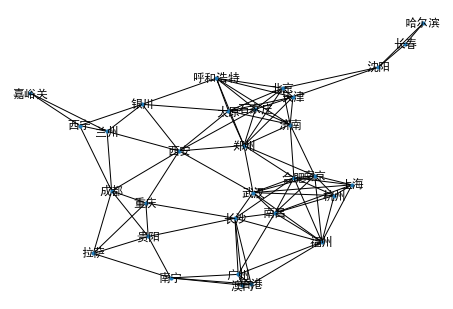

In [11]:
cities_connection_graph = nx.Graph(cities_connection)
nx.draw(cities_connection_graph, city_info, with_labels=True, node_size=10)

### BFS version1

In [12]:
def search_1(graph, start, destination):
    paths = [[start]] # 把起始点作为第一个搜索的路径点
    visited = set() # 记录检查过的路径点，避免重复检查
    
    while paths:
        path = paths.pop(0)
        froniter = path[-1]
        
        for city in graph[froniter]:
            if city in visited: continue
            
            new_path = path + [city]
            
            paths.append(new_path)
            
            if city == destination:
                return new_path
        visited.add(froniter)
    return []

In [13]:
search_1(cities_connection, '上海', '香港')

['上海', '福州', '香港']

### Optimal search using variation of BFS

In [14]:
def optimal_search(graph, start, destination, search_strategy):
    paths = [[start]]
    visited = set()
    while paths:
        path = paths.pop(0)
        froniter = path[-1]
        
        for city in graph[froniter]:
            if city in visited: continue
            
            new_path = path + [city]
            
            paths.append(new_path)

        paths = search_strategy(paths)
        visited.add(froniter)
        if paths and paths[0][-1] == destination:
            return paths[0]
    return []

In [15]:
# strategy
def sort_by_distance(paths):
    def distance_of_path(path):
        distance = 0
        for i in range(len(path) - 1):
            distance += city_distance(path[i], path[i+1])
        return distance
    return sorted(paths, key=distance_of_path)

In [16]:
optimal_search(cities_connection, '北京', '上海', sort_by_distance)

['北京', '济南', '南京', '上海']

In [17]:
optimal_search(cities_connection, '香港', '上海', sort_by_distance)

['香港', '福州', '上海']

### General code for BFS

BFS代码的通用版

In [19]:
def bfs(moves, start, destination, strategy=lambda x:x):
    """
    moves:       dict include all possible movements given a status
    start:       begin status
    destination: target status
    strategy:    the strategy that result in best searching result
    """
    paths = [[start]]
    searched = set()
    
    while paths:
        path = paths.pop(0)
        froniter = path[-1]
        
        for status in moves[froniter]:
            if status in searched: continue
            
            new_path = path + [status]
            
            paths.append(new_path)
            
        paths = strategy(paths)
        
        if paths and paths[0][-1] == destination:
            return paths[0]
        
        searched.add(froniter)
    return []

# PART2 Machine Learning

### Boston House Prices

In [20]:
from sklearn.datasets import load_boston
import random

In [21]:
dataset = load_boston()
x, y = dataset['data'], dataset['target']

In [22]:
x.shape

(506, 13)

In [23]:
y.shape

(506,)

In [24]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

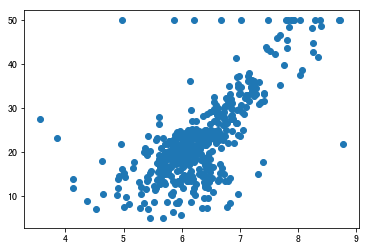

In [30]:
X_rm = x[:,5]
plt.scatter(X_rm, y);

### Gradient descent

#### Assume target function is linear function

$$ y=k*x+b $$

In [35]:
# define the target function
def linear_func(x, k, b):
    return k * x + b

#### Define mean square loss

$$
\begin{align}
loss & = \frac{1}{n}\sum(y_i-\hat{y_i})^2 \\
& = \frac{1}{n}\sum(y_i-(kx_i+b))^2 \\
\end{align}
$$

In [32]:
# define the loss function
def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(y, y_hat)) / len(y)

#### Define partial derivatives

$$ \frac{\partial loss}{\partial k} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i $$

$$ \frac{\partial loss}{\partial b} = -\frac{2}{n}\sum(y_i-\hat{y_i}) $$

In [60]:
# define the partial derivative
def partial_derivative_k(x, y, y_hat):
    return sum((y_i - y_hat_i) * x_i for y_i, y_hat_i, x_i in zip(y, y_hat, x)) * (-2 / len(y))

def partial_derivative_b(y, y_hat):
    return sum((y_i - y_hat_i) for y_i, y_hat_i in zip(y, y_hat)) * (-2 / len(y))

#### Calculate the parameters k, b

In [61]:
# y = kx + b
def linear_reg(y, x, learning_rate=1e-3, iteration_num=200):
    # randomly initialize start point in [-100, 100)
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    
    losses = []
    
    for i in range(iteration_num):
        y_hat = [linear_func(x_i, k, b) for x_i in x] # \hat_{y}
        current_loss = loss(y, y_hat)
        losses.append(current_loss)
        
        k_gradient = partial_derivative_k(x, y, y_hat)
        b_gradient = partial_derivative_b(y, y_hat)
        
        print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i, current_loss, k, b))
        
        k = k + (-1 * k_gradient) * learning_rate
        b = b + (-1 * b_gradient) * learning_rate
        
    return k, b, losses

In [62]:
k, b, losses = linear_reg(y, X_rm)

Iteration 0, the loss is 56620.20595987138, parameters k is 50.001376779199944 and b is -55.58799962943968
Iteration 1, the loss is 47728.15854237704, parameters k is 46.99322474440794 and b is -56.060238761375565
Iteration 2, the loss is 40233.875530776226, parameters k is 44.231596346514934 and b is -56.493723143607106
Iteration 3, the loss is 33917.63863800618, parameters k is 41.696287839181124 and b is -56.89162890748521
Iteration 4, the loss is 28594.267676176594, parameters k is 39.36875126605632 and b is -57.25687188578009
Iteration 5, the loss is 24107.691421332816, parameters k is 37.231958761170375 and b is -57.592128945347824
Iteration 6, the loss is 20326.37189835896, parameters k is 35.27027797053115 and b is -57.899857571486734
Iteration 7, the loss is 17139.447934649288, parameters k is 33.469357683495794 and b is -58.182313847265654
Iteration 8, the loss is 14453.484918787191, parameters k is 31.816022837177496 and b is -58.44156895936345
Iteration 9, the loss is 12189

Iteration 160, the loss is 52.30835110855129, parameters k is 13.281436444738919 and b is -61.25554237516629
Iteration 161, the loss is 52.30793230511815, parameters k is 13.281332504577781 and b is -61.25490362215581
Iteration 162, the loss is 52.307513523654215, parameters k is 13.28122884875206 and b is -61.25426484019952
Iteration 163, the loss is 52.307094763871255, parameters k is 13.281125454157163 and b is -61.25362603292921
Iteration 164, the loss is 52.30667602552613, parameters k is 13.281022299582025 and b is -61.25298720367899
Iteration 165, the loss is 52.30625730841371, parameters k is 13.280919365553919 and b is -61.25234835550969
Iteration 166, the loss is 52.30583861236117, parameters k is 13.28081663419599 and b is -61.25170949123126
Iteration 167, the loss is 52.30541993722226, parameters k is 13.280714089096472 and b is -61.25107061342334
Iteration 168, the loss is 52.30500128287416, parameters k is 13.280611715188614 and b is -61.25043172445412
Iteration 169, the 

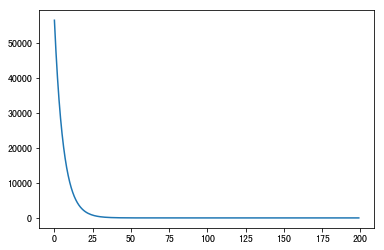

In [65]:
plt.plot(list(range(200)), losses);

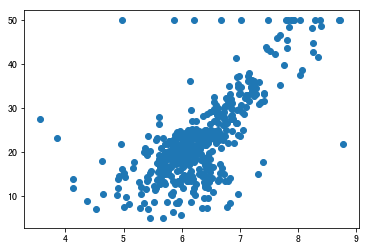

In [66]:
plt.scatter(X_rm, y)
plt.scatter(X_rm, [linear_func(x, k, b) f])